##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

###Load Dataset

In [2]:
data_sentiment_analysis = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/Dataset-SA.csv', nrows = 20000)

##EDA

In [3]:
data_sentiment_analysis.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
data_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   20000 non-null  object
 1   product_price  20000 non-null  object
 2   Rate           20000 non-null  object
 3   Review         20000 non-null  object
 4   Summary        19999 non-null  object
 5   Sentiment      20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [5]:
data_sentiment_analysis.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,1
Sentiment,0


In [6]:
data_sentiment_analysis = data_sentiment_analysis.dropna()

In [7]:
data_sentiment_analysis.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [8]:
# Identify non-numeric values in the 'Rate' column
non_numeric_rates = data_sentiment_analysis[pd.to_numeric(data_sentiment_analysis['Rate'], errors='coerce').isna()]

# Print the non-numeric values found
print("Non-numeric values found in 'Rate' column:")
print(non_numeric_rates['Rate'].unique())

# Remove rows where 'Rate' is not a valid number
data_sentiment_analysis = data_sentiment_analysis[pd.to_numeric(data_sentiment_analysis['Rate'], errors='coerce').notna()]

# Verify that non-numeric values are removed
print("\nAfter removing non-numeric values:")
print(data_sentiment_analysis['Rate'].unique())

# Convert the 'Rate' column to a numeric type
data_sentiment_analysis['Rate'] = pd.to_numeric(data_sentiment_analysis['Rate'])

# Display info to check the data type of 'Rate'
data_sentiment_analysis.info()

Non-numeric values found in 'Rate' column:
['Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)']

After removing non-numeric values:
['5' '3' '1' '4' '2']
<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   19998 non-null  object
 1   product_price  19998 non-null  object
 2   Rate           19998 non-null  int64 
 3   Review         19998 non-null  object
 4   Summary        19998 non-null  object
 5   Sentiment      19998 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


##Text Preprocessing

In [10]:
# Combine Summary and Review
data_sentiment_analysis['text'] = data_sentiment_analysis['Summary'].fillna('') + " " + data_sentiment_analysis['Review'].fillna('')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data_sentiment_analysis['clean_text'] = data_sentiment_analysis['text'].apply(preprocess_text)

##Vectorization

In [ ]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(data_sentiment_analysis['clean_text'])

###Combining Rate feature with Text

In [11]:
#Combine with Rate feature
X = np.hstack((X_tfidf.toarray(), data_sentiment_analysis[['Rate']].values))
y = data_sentiment_analysis['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
!pip install imbalanced-learn

###Most Frequent Words

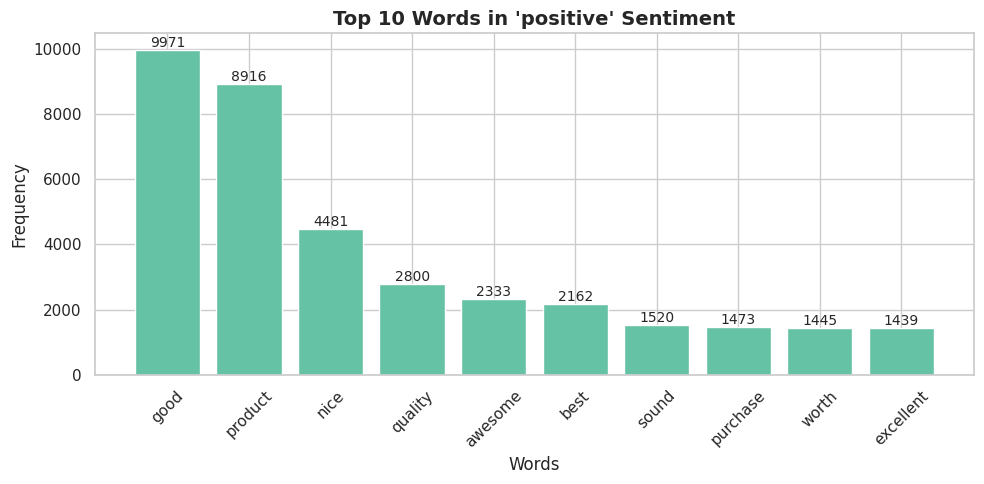

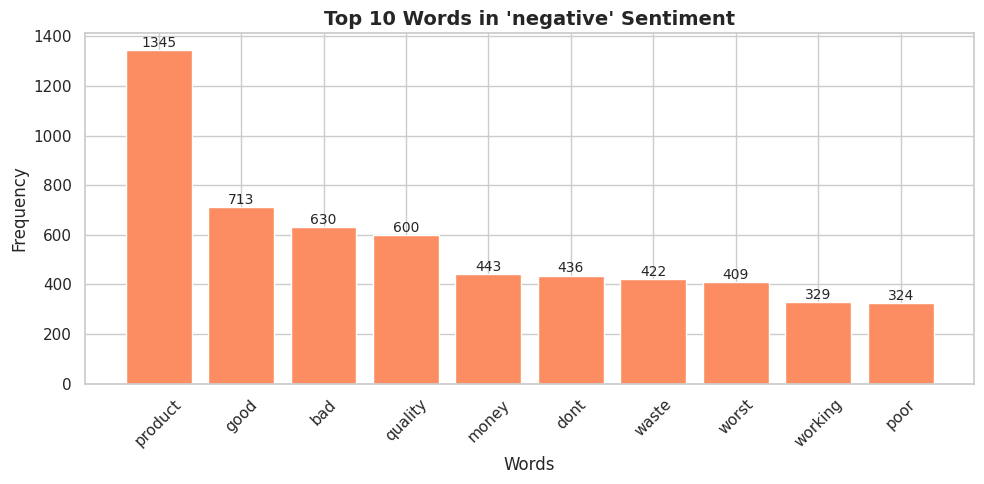

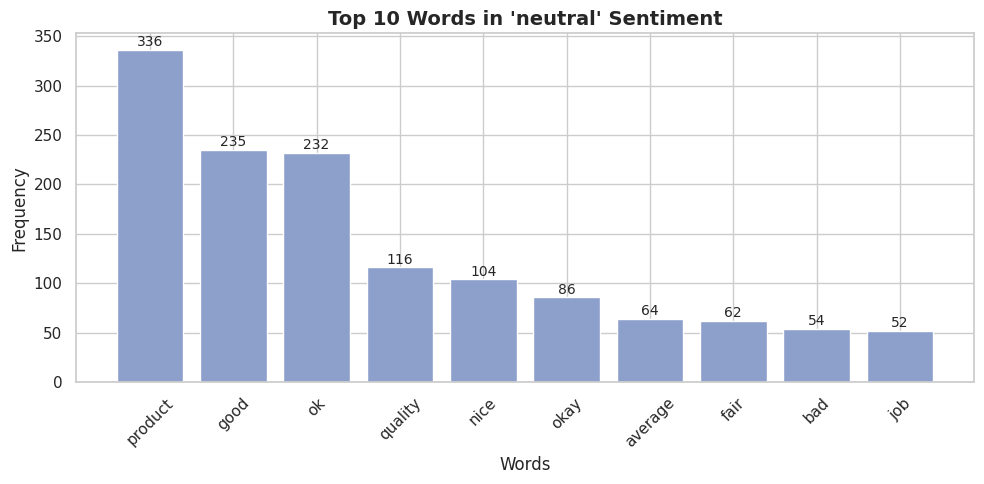

In [64]:
from collections import Counter

# Unique sentiments
sentiments = data_sentiment_analysis['Sentiment'].unique()
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Extend as needed

for i, sentiment in enumerate(sentiments):
    # Get all words for this sentiment
    text_data = data_sentiment_analysis[data_sentiment_analysis['Sentiment'] == sentiment]['clean_text']
    all_words = ' '.join(text_data).split()

    # Count top 10 words
    top_words = Counter(all_words).most_common(10)
    words, counts = zip(*top_words)

    # Plot with custom bar colors
    plt.figure(figsize=(10, 5))
    bars = plt.bar(words, counts, color=colors[i % len(colors)])

    plt.title(f"Top 10 Words in '{sentiment}' Sentiment", fontsize=14, weight='bold')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    # Optional: Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height + 0.5,
                 f'{int(height)}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

##WordCloud for each Sentiment Category

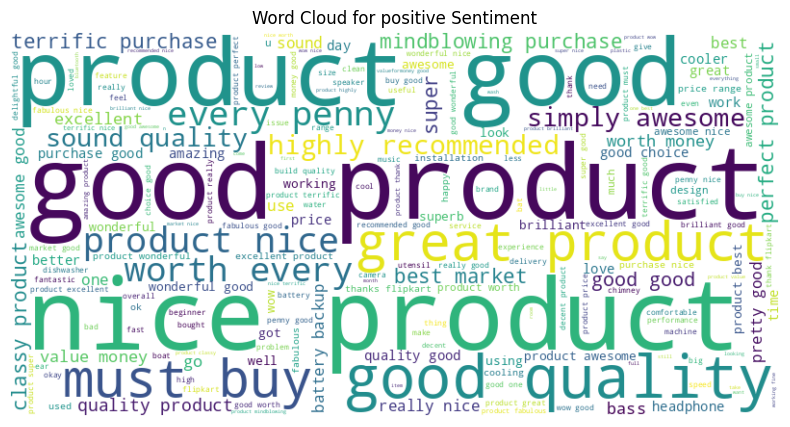

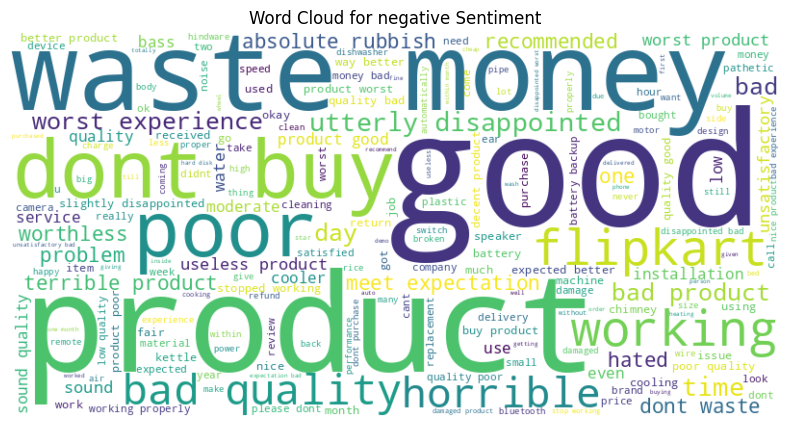

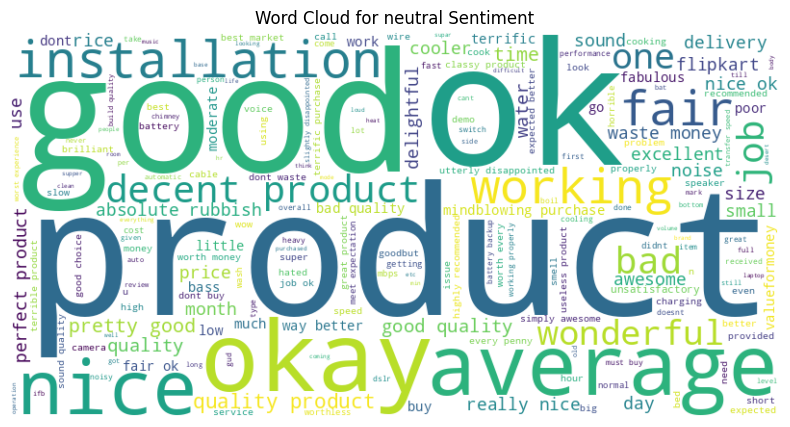

In [19]:
# WordCloud for each sentiment
from wordcloud import WordCloud

for sentiment in data_sentiment_analysis['Sentiment'].unique():
    text = ' '.join(data_sentiment_analysis[data_sentiment_analysis['Sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

###Sentiment Class Distribution

Text(0, 0.5, 'Count')

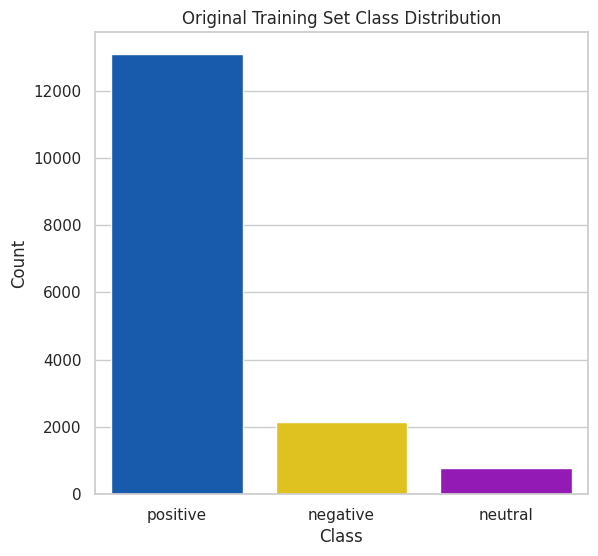

In [58]:
# Prepare DataFrames for plotting
df_original = pd.DataFrame({'Class': y_train})

# Plotting
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.countplot(x='Class', hue='Class', data=df_original, palette="prism", legend=False)
plt.title("Original Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

##Data Balancing using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")
print("Original training set class distribution:\n", y_train.value_counts())
print("Resampled training set class distribution:\n", y_train_resampled.value_counts())

Original training set shape: (15998, 5001)
Resampled training set shape: (39240, 5001)
Original training set class distribution:
 Sentiment
positive    13080
negative     2142
neutral       776
Name: count, dtype: int64
Resampled training set class distribution:
 Sentiment
positive    13080
negative    13080
neutral     13080
Name: count, dtype: int64


###Class Distribution after SMOTE

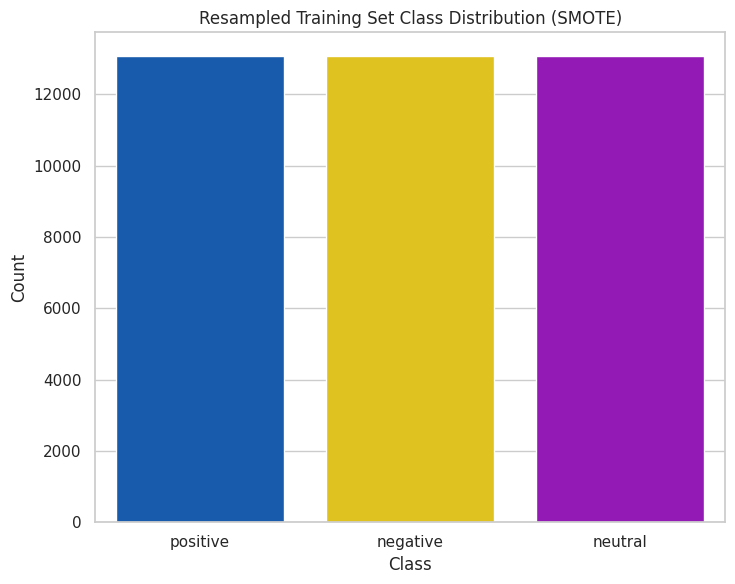

In [57]:
df_resampled = pd.DataFrame({'Class': y_train_resampled})

# Plotting
plt.figure(figsize=(14, 6))

# Resampled
plt.subplot(1, 2, 2)
sns.countplot(x='Class', hue='Class', data=df_resampled, palette="prism", legend=False)
plt.title("Resampled Training Set Class Distribution (SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

def evaluate_model(y_true, y_pred, model_name, y_proba=None, class_names=None):
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1 Score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Multiclass ROC Curve
    if y_proba is not None:
        y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
        n_classes = y_true_bin.shape[1]

        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Multiclass ROC Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()


##Naive Bayes

In [15]:
from sklearn.linear_model import LogisticRegression

#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)
nb_preds = nb_model.predict(X_test)

###Naive Bayes Results


=== Naive Bayes Evaluation ===
Accuracy: 0.8848
Precision (macro): 0.6910
Recall (macro): 0.7583
F1 Score (macro): 0.7133

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.81      0.80       524
     neutral       0.31      0.55      0.40       200
    positive       0.97      0.92      0.94      3276

    accuracy                           0.88      4000
   macro avg       0.69      0.76      0.71      4000
weighted avg       0.91      0.88      0.90      4000



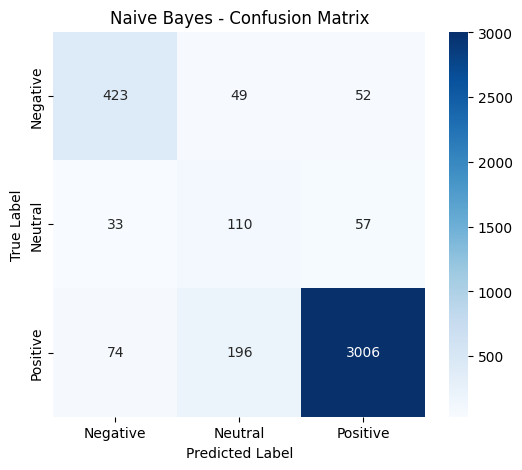

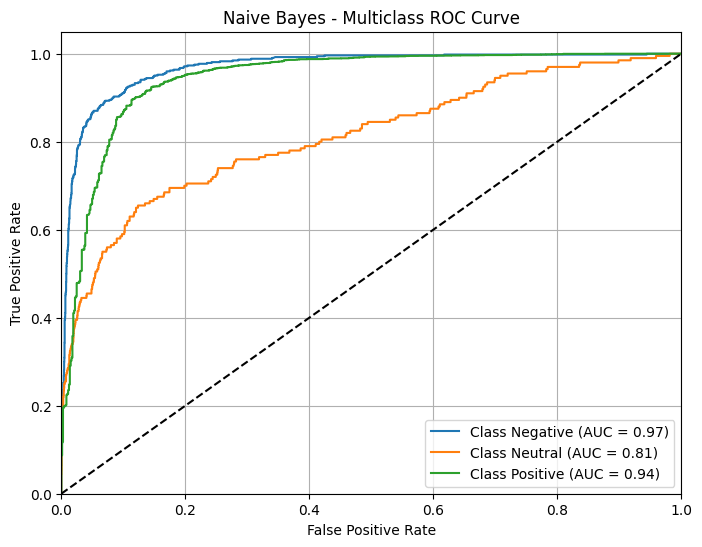

In [16]:
#Class names (ordered as in your labels)
class_names = ['Negative', 'Neutral', 'Positive']

#Naive Bayes
nb_probs = nb_model.predict_proba(X_test)
evaluate_model(y_test, nb_preds, "Naive Bayes", y_proba=nb_probs, class_names=class_names)

##Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Apply Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

###Radom Forest Results


=== Random Forest Evaluation ===
Accuracy: 0.9220
Precision (macro): 0.7655
Recall (macro): 0.7480
F1 Score (macro): 0.7558

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.83      0.82       524
     neutral       0.52      0.45      0.48       200
    positive       0.96      0.97      0.96      3276

    accuracy                           0.92      4000
   macro avg       0.77      0.75      0.76      4000
weighted avg       0.92      0.92      0.92      4000



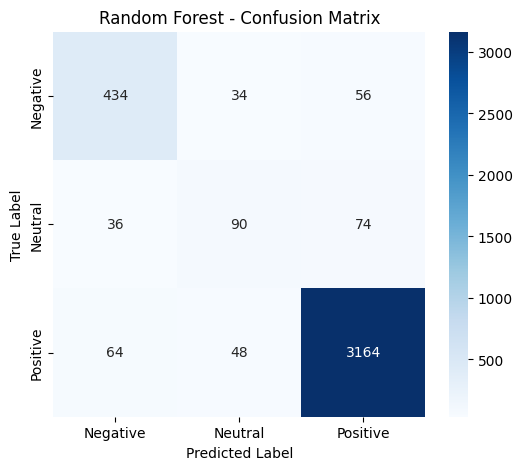

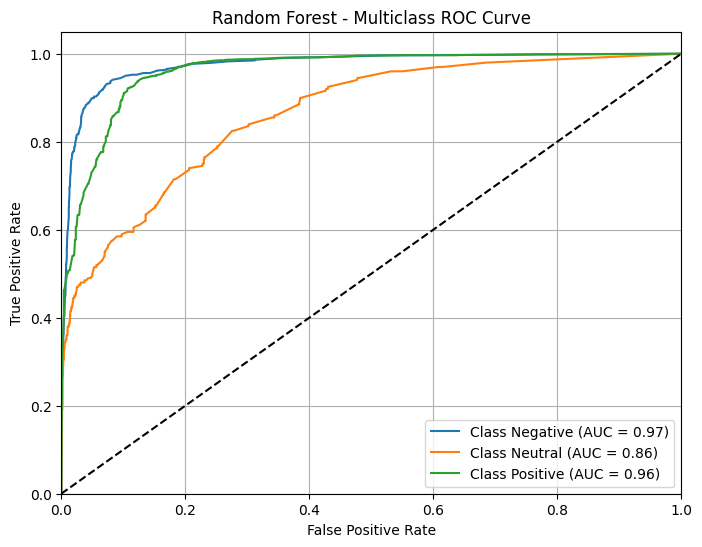

In [18]:
#Get probabilities for ROC curve
rf_probs = rf_model.predict_proba(X_test)

#Evaluate Random Forest model
evaluate_model(y_test, rf_preds, "Random Forest", y_proba=rf_probs, class_names=class_names)

In [20]:
print(data_sentiment_analysis['Sentiment'].value_counts())

Sentiment
positive    16356
negative     2666
neutral       976
Name: count, dtype: int64


##Data Balancing - LLM Models

In [21]:
from sklearn.utils import resample

# Separate by class
df_majority = data_sentiment_analysis[data_sentiment_analysis['Sentiment'] == 'positive']
df_negative = data_sentiment_analysis[data_sentiment_analysis['Sentiment'] == 'negative']
df_neutral = data_sentiment_analysis[data_sentiment_analysis['Sentiment'] == 'neutral']

# Upsample minority classes to match majority
df_negative_upsampled = resample(df_negative,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_neutral_upsampled = resample(df_neutral,
                                replace=True,
                                n_samples=len(df_majority),
                                random_state=42)

# Combine all
df_balanced = pd.concat([df_majority, df_negative_upsampled, df_neutral_upsampled])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine text fields for LLM
df_balanced['text'] = (
    df_balanced['Summary'].fillna('') + " " +
    df_balanced['Review'].fillna('') +
    " Rating: " + df_balanced['Rate'].astype(str)
)

# Encode labels
label_map = {label: i for i, label in enumerate(df_balanced['Sentiment'].unique())}
df_balanced['label'] = df_balanced['Sentiment'].map(label_map)

# Print new class balance
print("Balanced class distribution:\n", df_balanced['Sentiment'].value_counts())

Balanced class distribution:
 Sentiment
positive    16356
neutral     16356
negative    16356
Name: count, dtype: int64


##Distribution Plot after Balancing - LLM Models

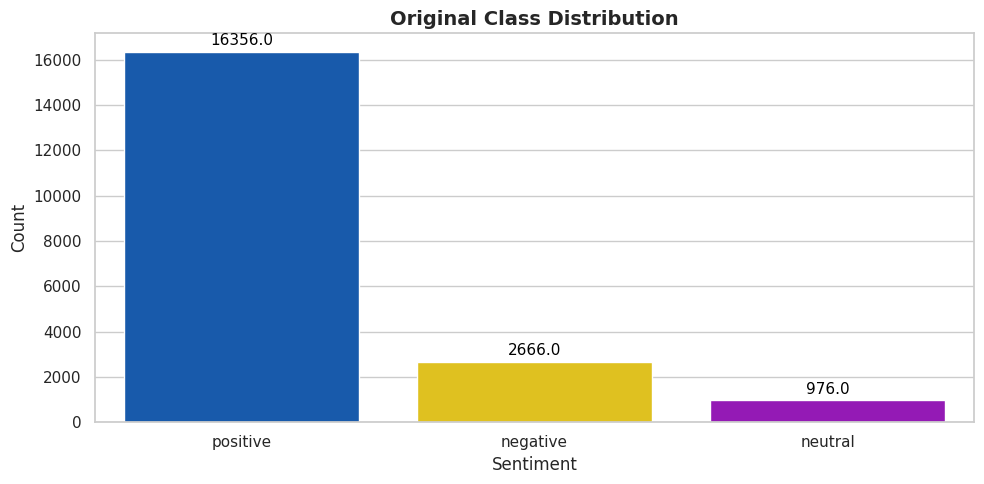

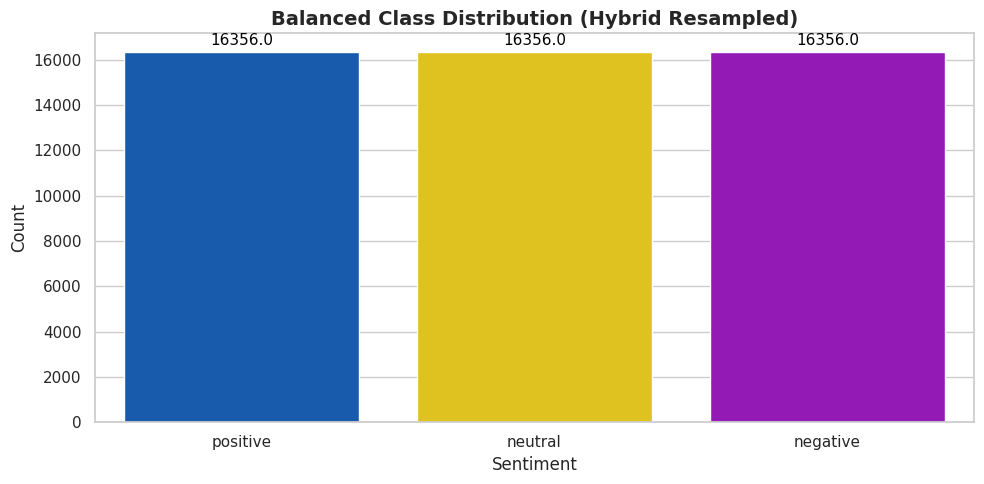

In [62]:
sns.set(style="whitegrid")

# Number of sentiment classes
num_classes = data_sentiment_analysis['Sentiment'].nunique()

# Custom color palettes
palette_before = sns.color_palette("prism", n_colors=num_classes)
palette_after = sns.color_palette("prism", n_colors=num_classes)

# --- Before Balancing ---
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Sentiment', hue='Sentiment', data=data_sentiment_analysis, palette=palette_before, legend=False)
plt.title("Original Class Distribution", fontsize=14, weight='bold')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8), textcoords='offset points')
plt.tight_layout()
plt.show()

# --- After Balancing ---
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Sentiment', hue='Sentiment', data=df_balanced, palette=palette_after, legend=False)
plt.title("Balanced Class Distribution (Hybrid Resampled)", fontsize=14, weight='bold')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8), textcoords='offset points')
plt.tight_layout()
plt.show()

In [23]:
pip install transformers datasets torch scikit-learn

In [24]:
from datasets import Dataset

dataset = Dataset.from_pandas(df_balanced[['text', 'label']])
dataset = dataset.train_test_split(test_size=0.2)

In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds, average='macro'),
        'recall': recall_score(labels, preds, average='macro'),
        'f1': f1_score(labels, preds, average='macro')
    }

def train_llm(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize
    tokenized_data = dataset.map(lambda x: tokenizer(
        x['text'], truncation=True, padding='max_length', max_length=256), batched=True)

    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_map)
    ).to('cuda' if torch.cuda.is_available() else 'cpu')

    # Training args with GPU & fp16
    args = TrainingArguments(
        output_dir=f'./results-{model_name}',
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=2,
        logging_dir='./logs',
        eval_strategy="epoch",
        logging_strategy="epoch",
        save_strategy="no",
        fp16=True if torch.cuda.is_available() else False,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_data['train'],
        eval_dataset=tokenized_data['test'],
        compute_metrics=compute_metrics
    )

    trainer.train()
    results = trainer.evaluate()
    print(f"\n🔍 {model_name} Evaluation:")
    for k, v in results.items():
        print(f"{k}: {v:.4f}")

    # Save model and tokenizer
    model.save_pretrained(f'./saved_models/{model_name}')
    tokenizer.save_pretrained(f'./saved_models/{model_name}')

##Training Distilbert

In [32]:
train_llm("distilbert-base-uncased")

Map:   0%|          | 0/39254 [00:00<?, ? examples/s]

Map:   0%|          | 0/9814 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.245200,0.083765,0.977277,0.977341,0.977306,0.977252
2,0.067800,0.064308,0.983901,0.983957,0.983914,0.983871



🔍 distilbert-base-uncased Evaluation:
eval_loss: 0.0643
eval_accuracy: 0.9839
eval_precision: 0.9840
eval_recall: 0.9839
eval_f1: 0.9839
eval_runtime: 18.6735
eval_samples_per_second: 525.5580
eval_steps_per_second: 32.8810
epoch: 2.0000


##Distilbert Results

In [39]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

def evaluate_saved_model(model_path, dataset, label_map, batch_size=32):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.to('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    # Tokenize the test data in batches
    test_data = dataset['test']
    encodings = tokenizer(
        list(test_data['text']),
        truncation=True,
        padding=True,
        return_tensors='pt',
        max_length=256
    )

    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    labels = torch.tensor(test_data['label'])

    # Create DataLoader
    test_dataset = TensorDataset(input_ids, attention_mask, labels)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    preds = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids, attention_mask, batch_labels = [b.to(model.device) for b in batch]

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            batch_preds = torch.argmax(outputs.logits, dim=1)

            preds.extend(batch_preds.cpu().numpy())
            true_labels.extend(batch_labels.cpu().numpy())

    # Metrics
    print("📊 Evaluation Metrics")
    print("Accuracy:", accuracy_score(true_labels, preds))
    print("Precision:", precision_score(true_labels, preds, average='macro'))
    print("Recall:", recall_score(true_labels, preds, average='macro'))
    print("F1 Score:", f1_score(true_labels, preds, average='macro'))
    print("\nClassification Report:\n", classification_report(true_labels, preds, target_names=label_map.keys()))

    # Confusion matrix
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_map.keys(), yticklabels=label_map.keys())
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

Evaluating: 100%|██████████| 307/307 [00:43<00:00,  7.12it/s]


📊 Evaluation Metrics
Accuracy: 0.9839005502343591
Precision: 0.9839569965371749
Recall: 0.9839143167223717
F1 Score: 0.983871379304534

Classification Report:
               precision    recall  f1-score   support

    positive       0.99      0.97      0.98      3278
     neutral       0.97      0.99      0.98      3241
    negative       0.99      0.99      0.99      3295

    accuracy                           0.98      9814
   macro avg       0.98      0.98      0.98      9814
weighted avg       0.98      0.98      0.98      9814



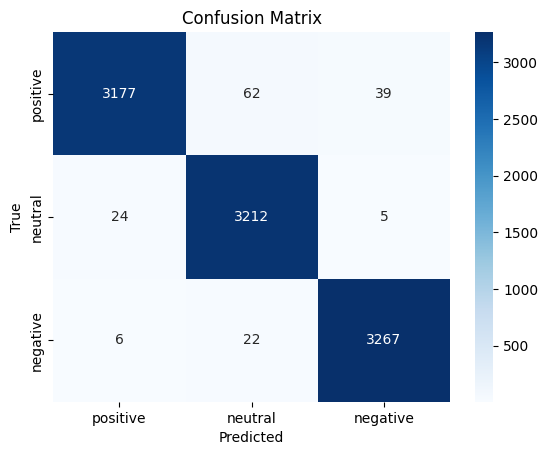

In [40]:
# Evaluate with batching to prevent OOM
evaluate_saved_model('./saved_models/distilbert-base-uncased', dataset, label_map, batch_size=32)

##Training Roberta Model

In [41]:
train_llm("roberta-base")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/39254 [00:00<?, ? examples/s]

Map:   0%|          | 0/9814 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.357900,0.147173,0.963521,0.963622,0.963513,0.963463
2,0.139700,0.091885,0.978093,0.978214,0.978122,0.978058



🔍 roberta-base Evaluation:
eval_loss: 0.0919
eval_accuracy: 0.9781
eval_precision: 0.9782
eval_recall: 0.9781
eval_f1: 0.9781
eval_runtime: 33.1741
eval_samples_per_second: 295.8330
eval_steps_per_second: 18.5080
epoch: 2.0000


##Roberta Results

Evaluating: 100%|██████████| 307/307 [01:03<00:00,  4.85it/s]


📊 Evaluation Metrics
Accuracy: 0.9780925208885266
Precision: 0.9782135460004721
Recall: 0.9781221516421809
F1 Score: 0.9780584041644745

Classification Report:
               precision    recall  f1-score   support

    positive       0.99      0.96      0.97      3278
     neutral       0.97      0.99      0.98      3241
    negative       0.98      0.99      0.98      3295

    accuracy                           0.98      9814
   macro avg       0.98      0.98      0.98      9814
weighted avg       0.98      0.98      0.98      9814



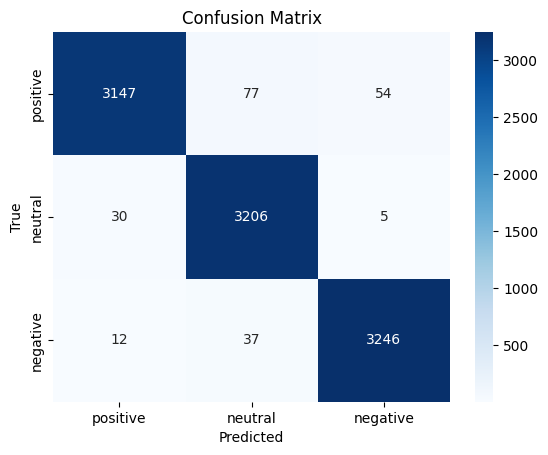

In [42]:
evaluate_saved_model('./saved_models/roberta-base', dataset, label_map, batch_size=32)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics(true_labels, pred_labels):
    return {
        'accuracy': accuracy_score(true_labels, pred_labels),
        'precision': precision_score(true_labels, pred_labels, average='macro'),
        'recall': recall_score(true_labels, pred_labels, average='macro'),
        'f1': f1_score(true_labels, pred_labels, average='macro')
    }

In [44]:
metrics_ml1 = get_metrics(y_test, rf_model.predict(X_test))
metrics_ml2 = get_metrics(y_test, nb_model.predict(X_test))

In [45]:
import torch
import numpy as np

def llm_predict(model, tokenizer, texts, batch_size=32):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    model.eval()

    all_preds = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=256, return_tensors='pt')
        inputs = {k: v.to(device) for k, v in encodings.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, axis=1).cpu().numpy()
            all_preds.extend(preds)
    return np.array(all_preds)

In [46]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

test_texts = dataset['test']['text']
test_labels = np.array(dataset['test']['label'])

# DistilBERT
tokenizer_distil = AutoTokenizer.from_pretrained('./saved_models/distilbert-base-uncased')
model_distil = AutoModelForSequenceClassification.from_pretrained('./saved_models/distilbert-base-uncased')
preds_distil = llm_predict(model_distil, tokenizer_distil, test_texts)
metrics_distil = get_metrics(test_labels, preds_distil)

# RoBERTa
tokenizer_roberta = AutoTokenizer.from_pretrained('./saved_models/roberta-base')
model_roberta = AutoModelForSequenceClassification.from_pretrained('./saved_models/roberta-base')
preds_roberta = llm_predict(model_roberta, tokenizer_roberta, test_texts)
metrics_roberta = get_metrics(test_labels, preds_roberta)

##Model Performance Comparison

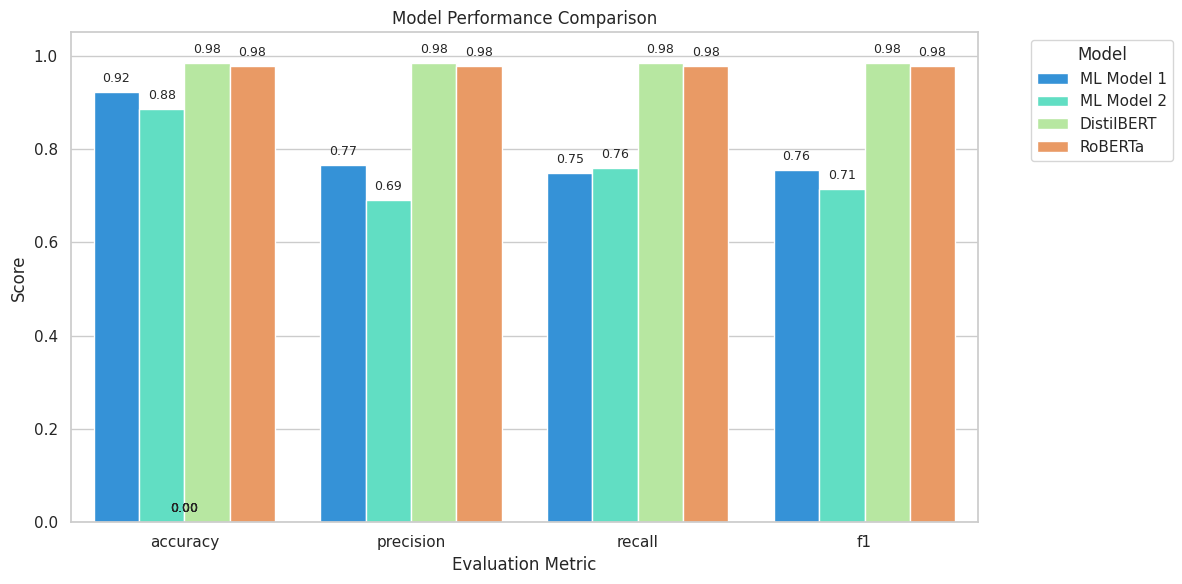

In [60]:
results = {
    'ML Model 1': metrics_ml1,
    'ML Model 2': metrics_ml2,
    'DistilBERT': metrics_distil,
    'RoBERTa': metrics_roberta
}

df_results = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='rainbow')

plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)  # Increased limit to give space for labels
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text labels on top of bars
for p in barplot.patches:
    height = p.get_height()
    if not pd.isna(height):  # Skip if height is NaN
        barplot.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.015,  # Slightly above bar, but within limits
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()